<a href="https://colab.research.google.com/github/amirmafzali/Neural_network-and-deep-learning_course/blob/main/MLP_CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import tensorflow as tf
import keras
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [23]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [26]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8692 - accuracy: 0.3230 - val_loss: 1.7606 - val_accuracy: 0.3690
Epoch 2/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6953 - accuracy: 0.3909 - val_loss: 1.6659 - val_accuracy: 0.4103
Epoch 3/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6087 - accuracy: 0.4204 - val_loss: 1.6003 - val_accuracy: 0.4387
Epoch 4/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5609 - accuracy: 0.4386 - val_loss: 1.5933 - val_accuracy: 0.4346
Epoch 5/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5294 - accuracy: 0.4527 - val_loss: 1.5899 - val_accuracy: 0.4374
Epoch 6/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.4940 - accuracy: 0.4657 - val_loss: 1.5599 - val_accuracy: 0.4512
Epoch 7/15
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4794 - accuracy: 0.4724 - val_loss: 1.5383 - val_a

In [30]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('\naccuracy = ',accuracy_score(y_test_arg, Y_pred),"\n")

313/313 [==============================] - 1s 3ms/step

accuracy =  0.4805 



313/313 [==============================] - 1s 3ms/step


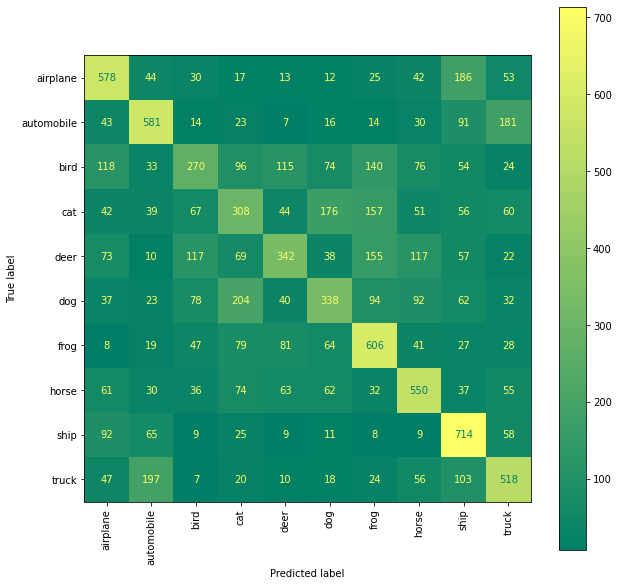

In [31]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()